<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/threed/EVA3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Render Texture with pytorch3d

https://sssiii.up.seesaa.net/image/pytorch3d_rendertexture.html


Installation

In [ ]:
!nvidia-smi
!git clone https://github.com/hongfz16/EVA3D.git
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
!pip install -r EVA3D/requirements.txt

Download models

In [ ]:
%cd EVA3D
from download_models import download_pretrained_models
download_pretrained_models()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please upload smpl neutral from this page(https://smpl.is.tue.mpg.de/download.php)


In [ ]:
!unzip /content/drive/MyDrive/SMPL_python_v.1.1.0.zip

In [ ]:
!mkdir smpl_models
!mkdir smpl_models/smpl
!cp /content/EVA3D/SMPL_python_v.1.1.0/smpl/models/basicmodel_neutral_lbs_10_207_0_v1.1.0.pkl smpl_models/smpl/SMPL_NEUTRAL.pkl

Inference

In [ ]:
!python generation_demo.py --batch 1 --chunk 1 --expname 512x256_deepfashion --dataset_path demodataset --depth 5 --width 128 --style_dim 128 --renderer_spatial_output_dim 512 256 --input_ch_views 3 --white_bg --voxhuman_name eva3d_deepfashion --deltasdf --N_samples 28 --ckpt 420000 --identities 1 --truncation_ratio 0.5

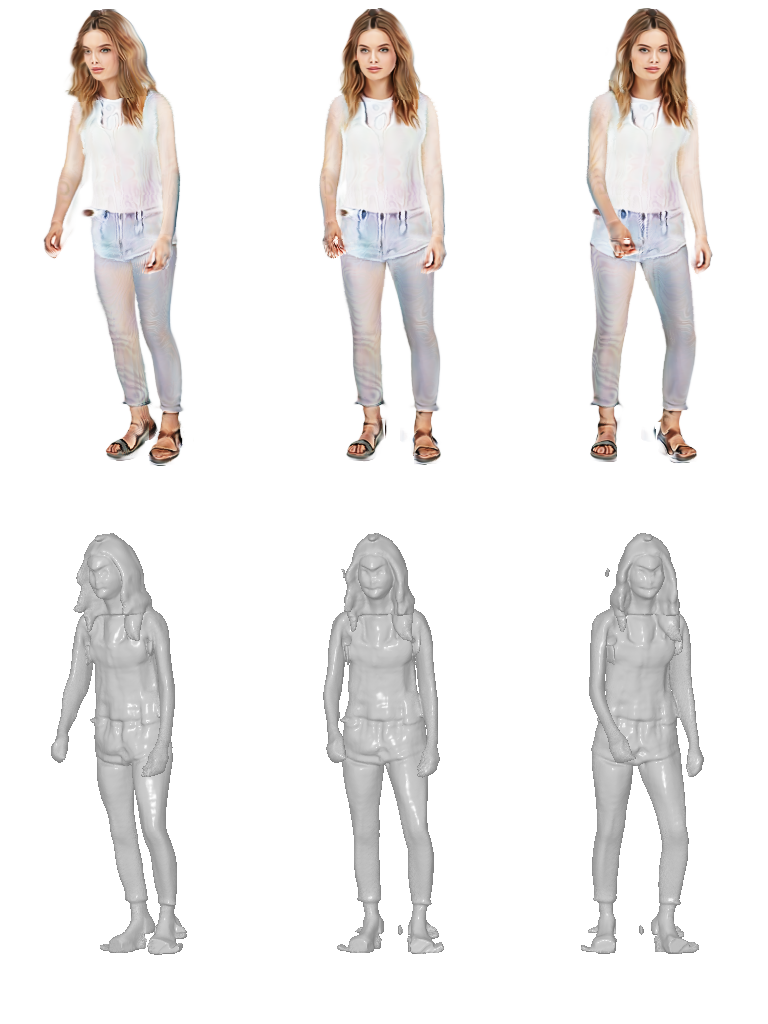

In [ ]:
from IPython.display import Image
Image('evaluations/512x256_deepfashion/iter_0420000/random_angles/images_paper_fig/0000000.png')

Try RGB 3d Meshes but I could ot work well

In [ ]:
# Please insert generation_demo.py at 187 and inference
"""
from pytorch3d.io import IO
save_3d_path = os.path.join(opt.results_dst_dir, 'out_rgb_3d.ply')

# IO().save_mesh(pt3d_mesh, save_3d_path)
IO().save_mesh(pt3d_mesh, save_3d_path, binary=False, colors_as_uint8=True)
"""

In [ ]:
# pytorch 3d plot
import torch
from pytorch3d.vis import plotly_vis
from pytorch3d.io import load_obj, load_objs_as_meshes
from pytorch3d.io import IO

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

obj_filename = "/content/EVA3D/evaluations/512x256_deepfashion/iter_0420000/random_angles/out_rgb_3d.ply"

device = "cuda"
mesh = IO().load_mesh(obj_filename)

# Render the plotly figure
fig = plotly_vis.plot_scene({
    "subplot1": {
        "cow_mesh": mesh
    }
})
fig.show()